# Problem 2: Spatial Models - Networks
## Implement SIR and Simulate

Watts Strogatz: https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html#networkx.generators.random_graphs.watts_strogatz_graph

Barabasi Albert: https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.barabasi_albert_graph.html#networkx.generators.random_graphs.barabasi_albert_graph

Erdos Reyni: https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph

In [27]:
import networkx as nx
import ndlib.models.ModelConfig as mc
import ndlib.models.epidemics as ep
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend
import matplotlib.pyplot as plt

# Parameter dict
params = {
    'fraction_infected': 0.05,
    'beta': 5,
    'gamma': 1
}

# Default/test function for simulation
def simulate_network_sir(graph, max_time, title=None, plot=False, visualise_network=False, return_trends=False):
    
    # Taken from ndlib tutorial: https://ndlib.readthedocs.io/en/latest/tutorial.html
    # Model selection
    model = ep.SIRModel(graph)

    # Model Configuration
    cfg = mc.Configuration()
    cfg.add_model_parameter('beta', params['beta'])
    cfg.add_model_parameter('gamma', params['gamma'])
    cfg.add_model_parameter('fraction_infected', params['fraction_infected'])
    model.set_initial_status(cfg)

    # Simulation execution
    iterations = model.iteration_bunch(max_time)

    # Collecting the trends
    trends = model.build_trends(iterations)

    # Plotting the trends
    if plot:
        viz = DiffusionTrend(model, trends)
        viz.ylabel = "Fraction of nodes"
        viz.normalized = False
        viz.title = title
        viz.plot()

    # Visualising the network
    if visualise_network:
        pos = nx.spring_layout(graph)  # or any layout you prefer
        nx.draw_networkx_nodes(graph, pos, node_size=10, node_color="blue", alpha=1.0)
        nx.draw_networkx_edges(graph, pos, edge_color="black", alpha=0.3)
        plt.show()
    
    if return_trends:   
        return trends




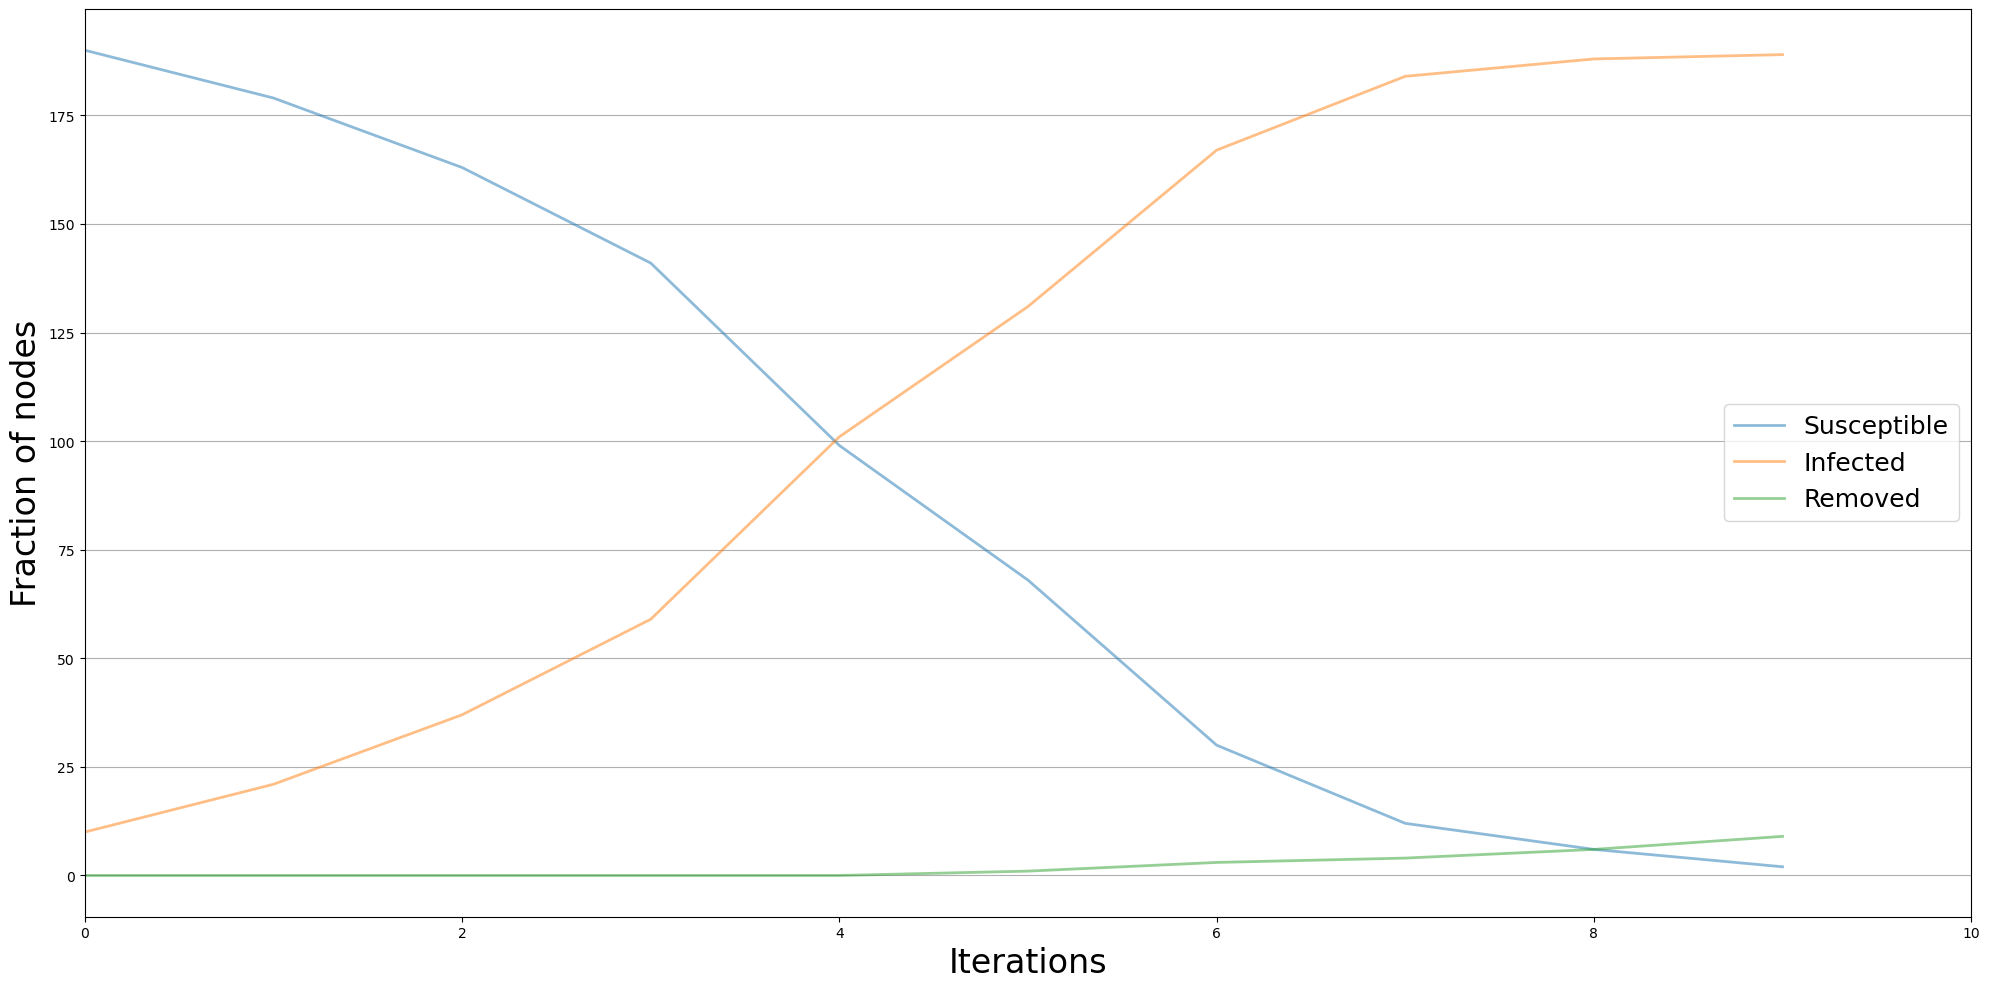

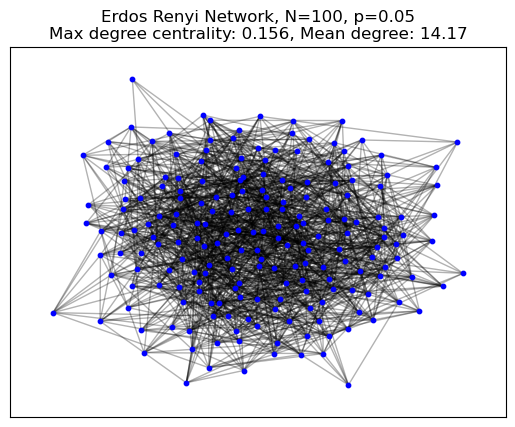

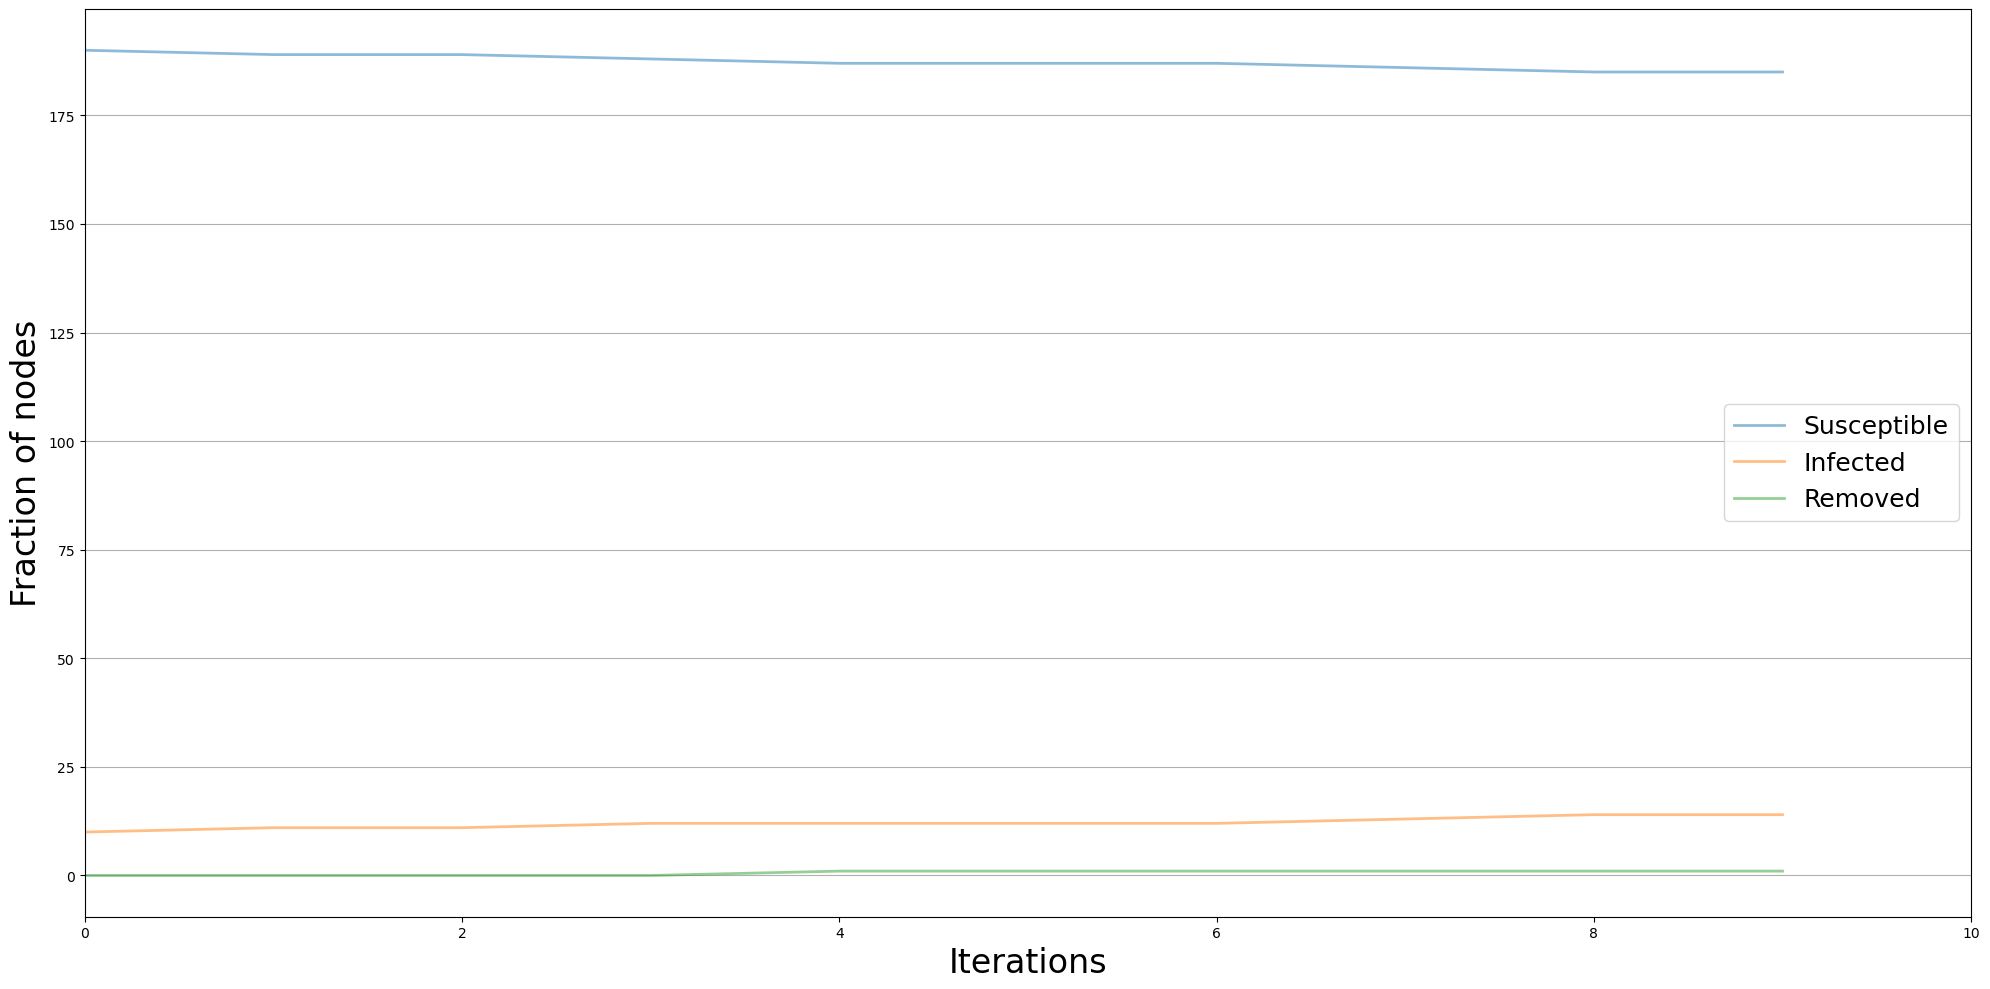

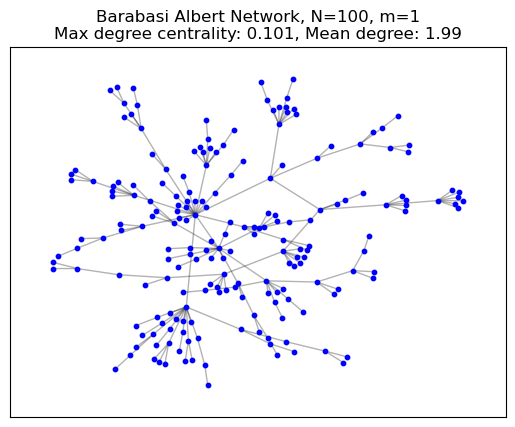

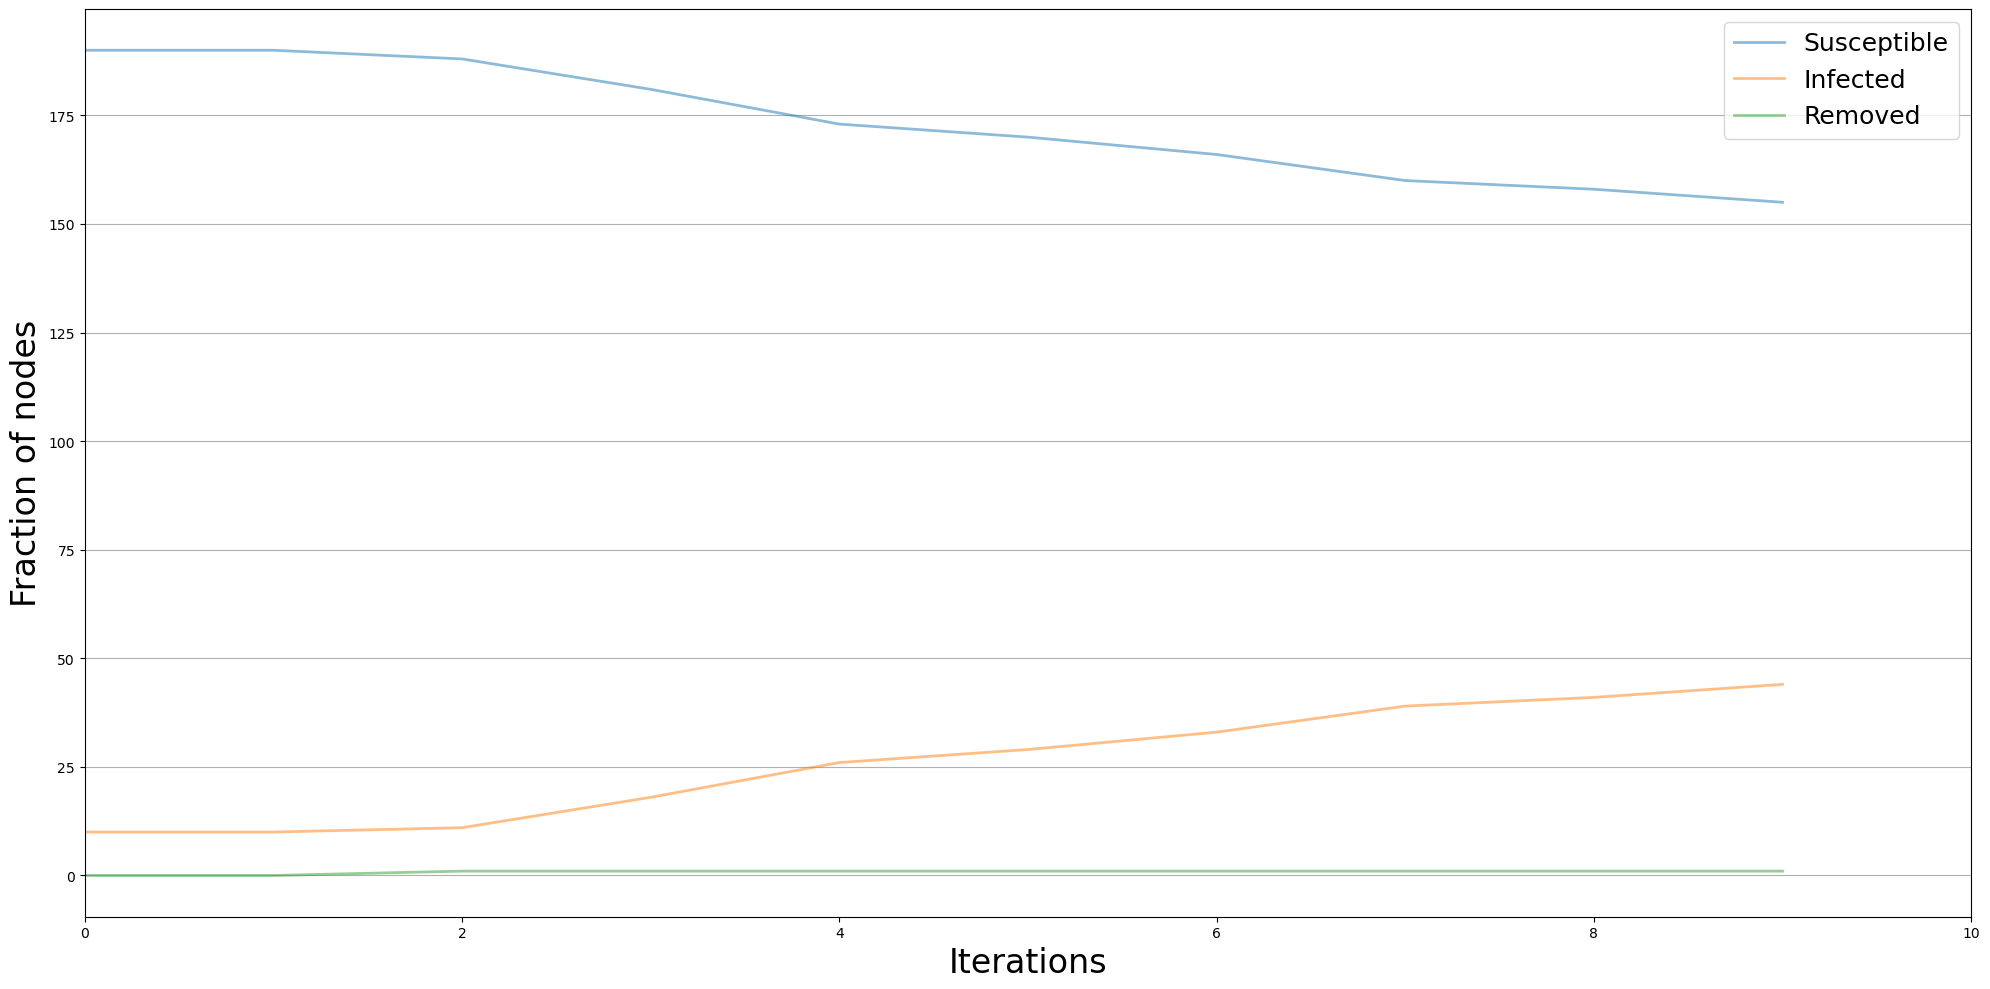

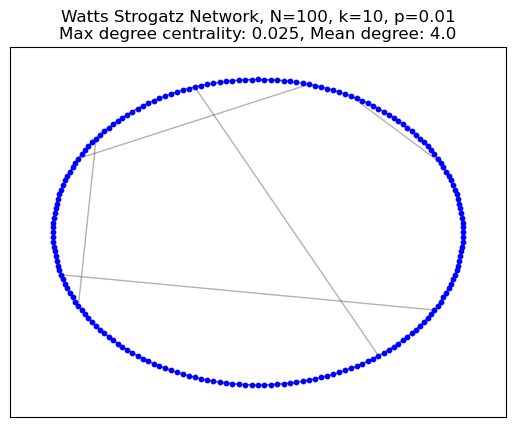

In [51]:
# Plot network topology for intuitive/qualitative understanding
# Erdos Renyi, Barabasi Albert, Watts Strogatz
%matplotlib inline

# Erdos Renyi
g = nx.erdos_renyi_graph(200, 0.07) # N nodes, p chance for edge creation
simulate_network_sir(g,10,plot=True,title="Erdos Renyi")

pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_size=10, node_color="blue", alpha=1.0)
nx.draw_networkx_edges(g, pos, edge_color="black", alpha=0.3)
centrality = nx.degree_centrality(g)
degrees = [d for n, d in g.degree()]
mean_degree = sum(degrees) / len(degrees)

plt.title("Erdos Renyi Network, N=100, p=0.05" + "\n" + "Max degree centrality: " + str(round(max(centrality.values()),3)) + ", Mean degree: " + str(round(mean_degree,2)))
plt.show()



# Barabasi Albert
g = nx.barabasi_albert_graph(200,1) # N nodes, m edges from new node
simulate_network_sir(g,10,plot=True,title="Barabasi Albert")

pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_size=10, node_color="blue", alpha=1.0)
nx.draw_networkx_edges(g, pos, edge_color="black", alpha=0.3)
centrality = nx.degree_centrality(g)
degrees = [d for n, d in g.degree()]
mean_degree = sum(degrees) / len(degrees)

plt.title("Barabasi Albert Network, N=100, m=1" + "\n" + "Max degree centrality: " + str(round(max(centrality.values()),3)) + ", Mean degree: " + str(round(mean_degree,2)))
plt.show()



# Watts Strogatz
g = nx.watts_strogatz_graph(200,5,0.01) # N nodes, k connected neighbours, p probability of rewiring each edge
simulate_network_sir(g,10,plot=True,title="Watts Strogatz")

pos = nx.shell_layout(g)
nx.draw_networkx_nodes(g, pos, node_size=10, node_color="blue", alpha=1.0)
nx.draw_networkx_edges(g, pos, edge_color="black", alpha=0.3)
centrality = nx.degree_centrality(g)
degrees = [d for n, d in g.degree()]
mean_degree = sum(degrees) / len(degrees)
plt.title("Watts Strogatz Network, N=100, k=10, p=0.01" + "\n" + "Max degree centrality: " + str(round(max(centrality.values()),3)) + ", Mean degree: " + str(round(mean_degree,2)))
plt.show()



{'node_count': {0: [950, 947, 943, 941, 937, 932, 928, 924, 922, 920, 917, 915, 911, 908, 904, 897, 894, 892, 890, 888, 886, 883, 879, 873, 868, 862, 859, 854, 850, 847, 840, 837, 833, 830, 825, 820, 817, 813, 808, 804, 803, 796, 788, 782, 772, 770, 766, 763, 759, 755, 751, 745, 734, 724, 716, 707, 701, 696, 693, 682, 676, 671, 664, 655, 649, 638, 631, 624, 616, 609, 597, 587, 577, 572, 563, 557, 550, 546, 539, 531, 524, 516, 512, 508, 502, 497, 495, 489, 481, 478, 471, 464, 450, 445, 438, 433, 428, 423, 417, 408, 402, 398, 394, 387, 383, 378, 374, 370, 366, 365, 360, 356, 350, 345, 339, 336, 327, 321, 317, 312, 307, 306, 304, 299, 295, 287, 285, 282, 277, 276, 274, 271, 268, 264, 260, 257, 256, 252, 247, 246, 243, 238, 235, 234, 232, 231, 227, 223, 222, 220, 217, 215, 211, 209, 208, 206, 200, 197, 197, 195, 194, 192, 187, 186, 183, 183, 181, 181, 180, 178, 175, 173, 171, 171, 169, 167, 166, 165, 163, 162, 161, 159, 157, 157, 155, 155, 155, 154, 154, 150, 147, 145, 144, 144, 142, 141, 

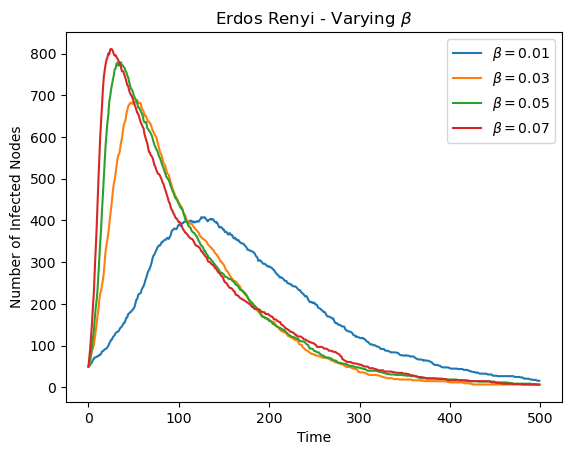

{'node_count': {0: [950, 947, 939, 932, 925, 921, 913, 910, 905, 896, 893, 888, 881, 875, 871, 863, 858, 846, 838, 833, 826, 816, 806, 792, 783, 774, 769, 756, 748, 738, 725, 716, 704, 694, 684, 676, 671, 660, 645, 633, 623, 612, 602, 591, 583, 573, 559, 550, 541, 533, 522, 509, 499, 490, 479, 469, 461, 450, 443, 435, 431, 419, 410, 401, 392, 384, 378, 369, 361, 356, 353, 349, 343, 338, 332, 329, 320, 314, 308, 302, 294, 290, 286, 280, 276, 272, 266, 257, 254, 251, 247, 241, 235, 229, 225, 223, 218, 215, 214, 208, 205, 203, 199, 195, 191, 186, 182, 180, 179, 177, 174, 174, 172, 171, 167, 165, 164, 161, 158, 156, 155, 155, 155, 153, 150, 150, 146, 146, 145, 144, 142, 140, 137, 134, 132, 129, 126, 126, 125, 123, 122, 121, 117, 116, 115, 115, 113, 113, 111, 111, 110, 109, 109, 109, 107, 107, 107, 107, 105, 105, 105, 105, 105, 104, 100, 99, 99, 99, 99, 99, 99, 98, 97, 96, 96, 94, 94, 94, 94, 93, 93, 93, 93, 93, 93, 92, 92, 92, 92, 92, 92, 91, 90, 89, 89, 89, 89, 88, 87, 86, 86, 85, 84, 84,

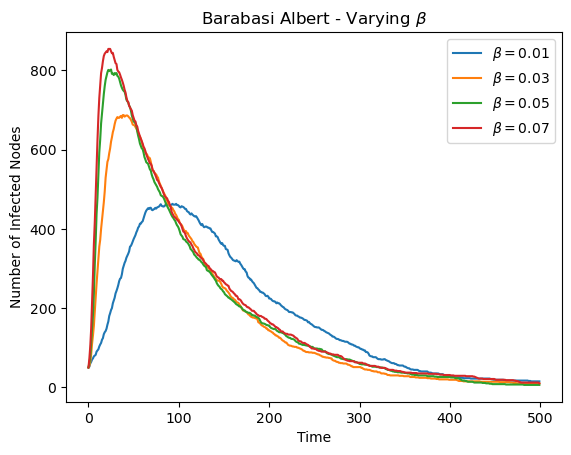

{'node_count': {0: [950, 942, 939, 927, 923, 920, 914, 906, 897, 886, 882, 872, 859, 855, 849, 841, 833, 829, 818, 813, 805, 799, 790, 780, 773, 763, 755, 740, 727, 716, 707, 693, 682, 667, 654, 645, 637, 625, 618, 607, 591, 582, 574, 566, 554, 542, 532, 516, 503, 493, 487, 475, 463, 457, 450, 441, 431, 424, 421, 414, 412, 399, 388, 383, 372, 369, 358, 349, 343, 336, 330, 322, 318, 315, 310, 304, 296, 292, 288, 284, 281, 272, 265, 262, 252, 245, 238, 235, 230, 221, 214, 210, 203, 199, 194, 186, 181, 176, 174, 171, 167, 164, 159, 153, 151, 147, 142, 140, 140, 138, 130, 122, 117, 114, 111, 109, 107, 107, 103, 100, 97, 94, 90, 87, 84, 82, 80, 78, 77, 73, 72, 69, 66, 65, 64, 63, 61, 60, 59, 58, 57, 56, 52, 51, 50, 49, 48, 48, 48, 48, 45, 44, 44, 44, 44, 44, 44, 43, 42, 41, 41, 39, 38, 37, 35, 34, 33, 32, 32, 31, 30, 29, 27, 24, 23, 22, 22, 20, 20, 20, 19, 19, 18, 18, 18, 17, 17, 17, 17, 17, 17, 17, 16, 16, 16, 15, 15, 15, 15, 15, 15, 13, 13, 13, 12, 12, 12, 12, 12, 11, 10, 9, 9, 9, 9, 8, 8

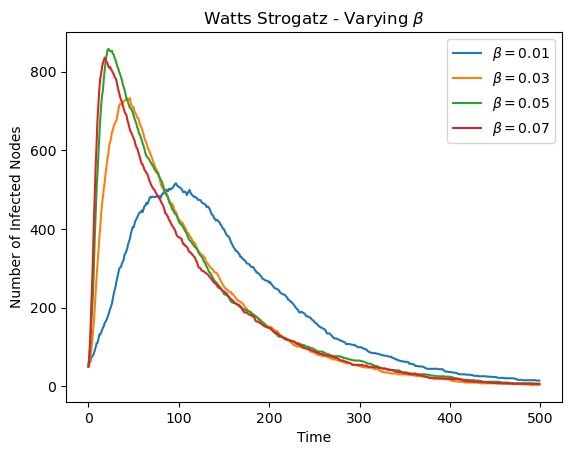

In [42]:
# Experiment with parameters (beta, gamma, fraction_infected) on given network type
%matplotlib inline
def experiment_parameters(graph, params, max_time, param_name, param_values, title_prefix):
    for value in param_values:
        params[param_name] = value
        data = simulate_network_sir(graph, max_time, return_trends=True)
        trends = data[0]['trends']
        print(trends)
        # Plotting the trends
        plt.plot(range(len(trends['node_count'][1])), trends['node_count'][1], label=rf"$\{param_name}={value}$")
    
    plt.xlabel("Time")
    plt.ylabel("Number of Infected Nodes")
    plt.title(rf"{title_prefix} - Varying $\{param_name}$")
    plt.legend()
    plt.show()

# Example usage:
params['beta'] = 0.05  # Reset to default
params['gamma'] = 0.01  # Reset to default
params['fraction_infected'] = 0.05  # Reset to default  

g = nx.erdos_renyi_graph(1000, 0.005) # N nodes, p chance for edge creation
experiment_parameters(g, params, 500, 'beta', [0.01, 0.03, 0.05, 0.07], "Erdos Renyi")

g = nx.barabasi_albert_graph(1000,3) # N nodes, m edges from new node
experiment_parameters(g, params, 500, 'beta', [0.01, 0.03, 0.05, 0.07], "Barabasi Albert")

g = nx.watts_strogatz_graph(1000,10,0.01) # N nodes, k connected neighbours, p probability of rewiring each edge
experiment_parameters(g, params, 500, 'beta', [0.01, 0.03, 0.05, 0.07], "Watts Strogatz")
        

# Load Socipatterns data

Loaded graph with 384 nodes and 375 edges


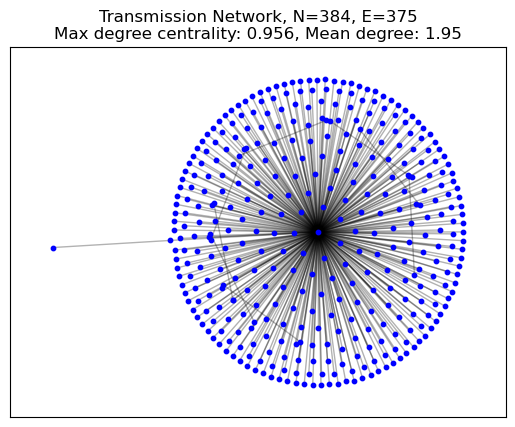

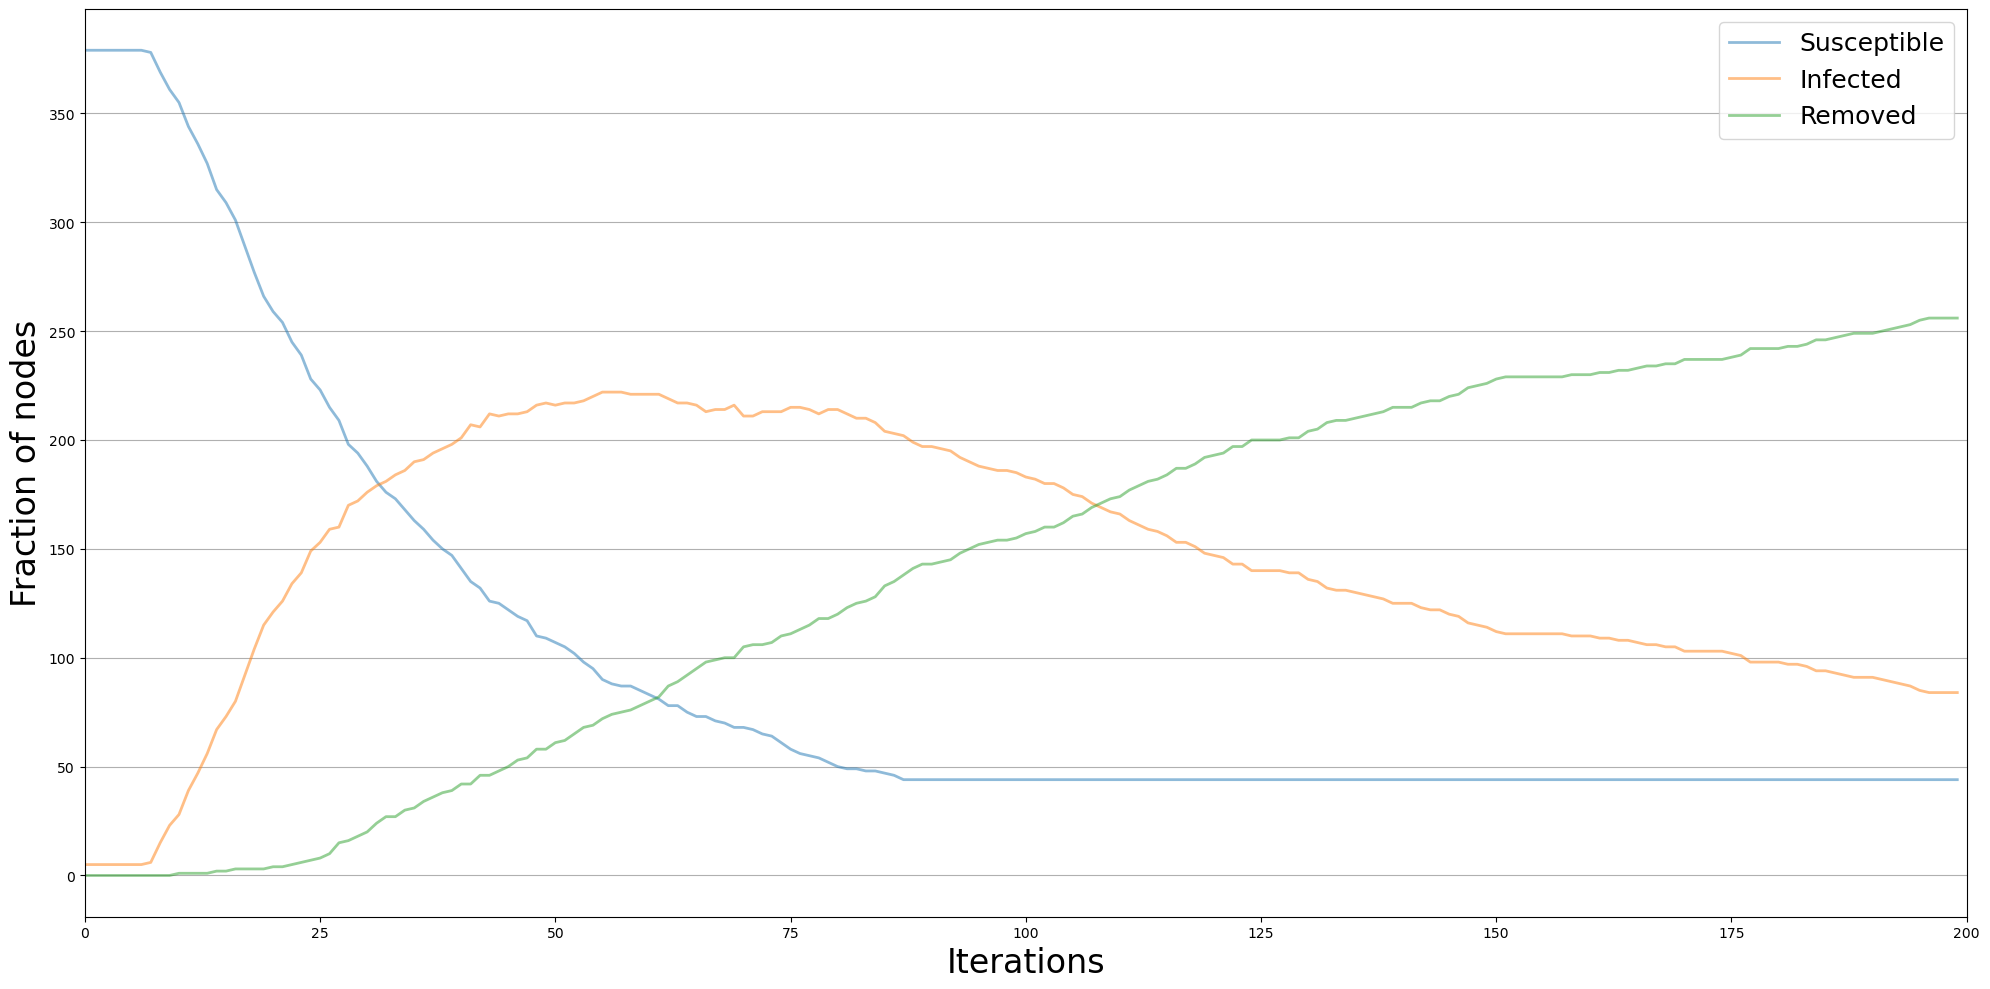

In [89]:
g = nx.read_edgelist("data/transmission_network.csv", delimiter=";", create_using=nx.Graph(),data=False)
print("Loaded graph with {} nodes and {} edges".format(g.number_of_nodes(), g.number_of_edges()))

# Show graph info
pos = nx.kamada_kawai_layout(g)
# pos = nx.planar_layout(g)
# pos = nx.spring_layout(g)
nx.draw_networkx_nodes(g, pos, node_size=10, node_color="blue", alpha=1.0)
nx.draw_networkx_edges(g, pos, edge_color="black", alpha=0.3)
centrality = nx.degree_centrality(g)
degrees = [d for n, d in g.degree()]
mean_degree = sum(degrees) / len(degrees)

plt.title("Transmission Network, N={}, E={}".format(g.number_of_nodes(), g.number_of_edges()) + "\n" + "Max degree centrality: " + str(round(max(centrality.values()),3)) + ", Mean degree: " + str(round(mean_degree,2)))
plt.show()

# Simulate SIR on this network
params['beta'] = 0.03
params['gamma'] = 0.01
params['fraction_infected'] = 5/384
simulate_network_sir(g,200,plot=True,title="Transmission Network SIR Simulation")